In [1]:
from urllib.request import urlopen
from matplotlib import pyplot

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

from src.segment import egg_contours
from src.load import load_image

# If we are using PyCharm dark mode, the image will be inverted unless we do this
pyplot.style.use('dark_background')

In [2]:
data = pd.read_csv('California_Egg_Data.csv')
image_urls = data['IMAGE URL']

In [3]:
image = load_image(image_urls[0])

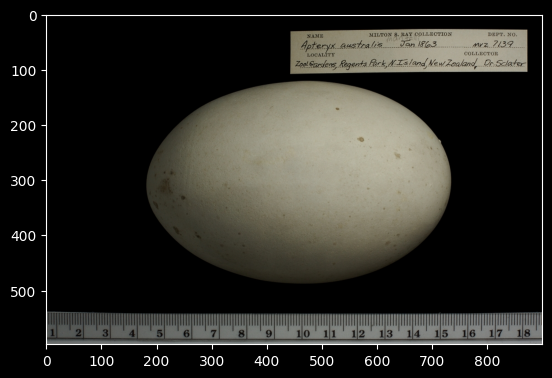

In [4]:
plt.imshow(image)

https://learnopencv.com/contour-detection-using-opencv-python-c/
opencv code for threshold and for finding contours
Hyper-parameters could probably use some tweaking, but for now these values always get the eggs and exclude most text

https://www.geeksforgeeks.org/find-circles-and-ellipses-in-an-image-using-opencv-python/
Blob detection to find just the eggs and not the text or the rectangle for the notes

In [5]:
contour_list = egg_contours(image)

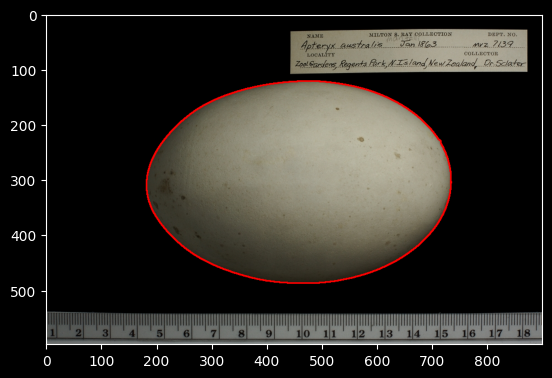

In [6]:
cv2.drawContours(image, contour_list,  -1, (255,0,0), 2)
plt.imshow(image)